Trends

1: Relative to suburban and rural communities, there are more rides in urban areas and the average fare is cheaper.  Similarly, suburban communities have cheaper average fares and more rides compared to their rural counterparts.

2: The number of drivers in urban areas were disproportionately greater (77.9%) as compared to the percentage of rides that were provided in urban areas (68.4%).  On the other hand, a smaller percentage of drivers provided a larger percentage of rides in suburban and rural areas.

3: Just under 2/3 of revenue (63%) comes from rides provided in urban areas, 30% from rides provided in suburban areas and only 6.7% from rides provided in rural areas.



In [52]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import seaborn as sns

In [54]:
city_data = pd.read_csv("raw_data/city_data.csv")
#city_data.head()
city_data = city_data.drop(city_data.index[[100]])
city_data = city_data.sort_values("city")
city_data = city_data.set_index('city')
city_data.head()

,driver_count,type
city,,
Alvarezhaven,21,Urban
Alyssaberg,67,Urban
Anitamouth,16,Suburban
Antoniomouth,21,Urban
Aprilchester,49,Urban


In [55]:
# city_data["ride_count"] = ""
# city_data["mean_fare"] = ""
city_data["color"] = ""
city_data.head()

,driver_count,type,color
city,,,
Alvarezhaven,21,Urban,
Alyssaberg,67,Urban,
Anitamouth,16,Suburban,
Antoniomouth,21,Urban,
Aprilchester,49,Urban,


In [56]:
color_dict = {"Rural":"Gold", "Suburban": "lightskyblue", "Urban":"lightcoral"}
for index, row in city_data.iterrows():
    if row["type"] == "Urban":
        city_data["color"][index] = color_dict["Urban"]
    elif row["type"] == "Suburban":
        city_data["color"][index] = color_dict["Suburban"]
    else:
        city_data["color"][index] = color_dict["Rural"]
city_data.head()
        

/Users/Madeleine/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Madeleine/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Madeleine/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,driver_count,type,color
city,,,
Alvarezhaven,21,Urban,lightcoral
Alyssaberg,67,Urban,lightcoral
Anitamouth,16,Suburban,lightskyblue
Antoniomouth,21,Urban,lightcoral
Aprilchester,49,Urban,lightcoral


In [57]:
ride_data = pd.read_csv("raw_data/ride_data.csv")
#drop extra data point
ride_data.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [60]:
grouped_ride_data = ride_data.groupby("city")
city_data["mean_fare"] = grouped_ride_data["fare"].mean()
city_data["ride_count"] = grouped_ride_data["ride_id"].count()
city_data.head()

,driver_count,type,color,mean_fare,ride_count
city,,,,,
Alvarezhaven,21,Urban,lightcoral,23.928710,31
Alyssaberg,67,Urban,lightcoral,20.609615,26
Anitamouth,16,Suburban,lightskyblue,37.315556,9
Antoniomouth,21,Urban,lightcoral,23.625000,22
Aprilchester,49,Urban,lightcoral,21.981579,19


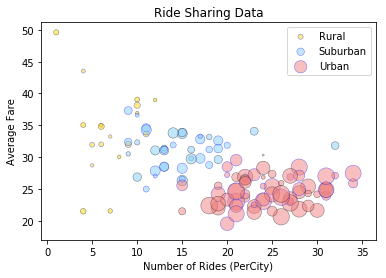

In [70]:
grouped_bytype = city_data.groupby('type')

for key, grp in grouped_bytype:    
    plt.scatter(x=grp["ride_count"],y=grp["mean_fare"],
            c=grp.color, 
            label=key,
            alpha=0.5,
            s=(grp.driver_count*4),
            edgecolors='bk',linewidths=.5)
    
plt.title("Ride Sharing Data")
plt.xlabel("Number of Rides (PerCity)")
plt.ylabel("Average Fare")

plt.legend();
plt.show()

In [81]:
merged_data = pd.merge(city_data,ride_data, left_index=True, right_on="city", how="outer")
merged_data.head()

,driver_count,type,color,mean_fare,ride_count,city,date,fare,ride_id
117,21,Urban,lightcoral,23.92871,31,Alvarezhaven,2016-04-18 20:51:29,31.93,4267015736324
125,21,Urban,lightcoral,23.92871,31,Alvarezhaven,2016-08-01 00:39:48,6.42,8394540350728
155,21,Urban,lightcoral,23.92871,31,Alvarezhaven,2016-09-01 22:57:12,18.09,1197329964911
250,21,Urban,lightcoral,23.92871,31,Alvarezhaven,2016-08-18 07:12:06,20.74,357421158941
340,21,Urban,lightcoral,23.92871,31,Alvarezhaven,2016-04-04 23:45:50,14.25,6431434271355


In [83]:
merged_groupby_type = merged_data.groupby("type")

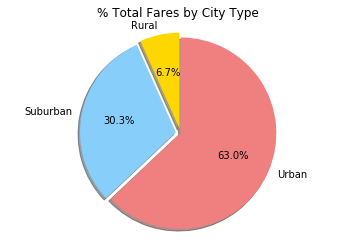

In [93]:
# % of Total Fares by City Type
#Find total fares 
total_fares = merged_data['fare'].sum()

#Find total fares 
total_fares_by_type = merged_groupby_type["fare"].sum()
percent_fares_by_type = total_fares_by_type/total_fares*100
percent_fares_by_type

types = ["Rural", "Suburban","Urban"]
colors = ["Gold", "lightskyblue", "lightcoral"]
explode = (0.05, 0.05, 0)

plt.title("% Total Fares by City Type")
plt.pie(percent_fares_by_type, labels=types, colors=colors, autopct="%1.1f%%",startangle=90, shadow=True, explode=explode)
plt.axis("equal")
plt.show()

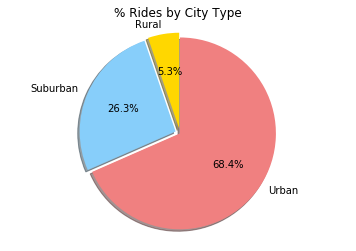

In [94]:
# % of Total Rides by City Type
total_rides = ride_data["fare"].count()

#Find total fares 
total_rides_by_type = merged_groupby_type["fare"].count()
percent_rides_by_type = total_rides_by_type/total_rides*100
percent_rides_by_type

types = ["Rural", "Suburban","Urban"]
colors = ["Gold", "lightskyblue", "lightcoral"]
explode = (0.05, 0.05, 0)

plt.title("% Rides by City Type")
plt.pie(percent_rides_by_type, labels=types, colors=colors, autopct="%1.1f%%",startangle=90, shadow=True, explode=explode)
plt.axis("equal")
plt.show()


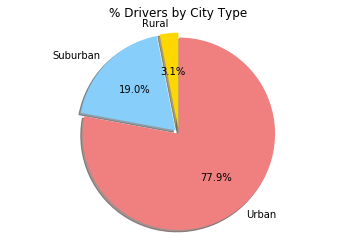

In [95]:
# % of Total Drivers by City Type
# groupby_type = merged_data.groupby(["type", "city"])
# driver_count = groupby_type["driver_count"].first()
# driver_count


total_drivers = city_data["driver_count"].sum()
total_drivers

total_drivers_by_type = grouped_bytype["driver_count"].sum()
total_drivers_by_type
percent_drivers_by_type = total_drivers_by_type/total_drivers*100
percent_drivers_by_type

types = ["Rural", "Suburban","Urban"]
colors = ["Gold", "lightskyblue", "lightcoral"]
explode = (0.05, 0.05, 0)

plt.title("% Drivers by City Type")
plt.pie(percent_drivers_by_type, labels=types, colors=colors, autopct="%1.1f%%",startangle=90, shadow=True, explode=explode)
plt.axis("equal")
plt.show()